GDP/GDP per capita and Life expectancy correletaions

I have 2 datasets 1 containing data about GDP & GDP per capita for countries.
And the other dataset containing Life expectancy for countries randing from the year 2000 to 2015

Method to compare:
1. Merge datasets on Country name and Year
2. Clean the data by removing NaN values for GDP per capita and Life expectancy
3. Calculate the mean of GDP per capita and Life expectancy for data we have left
4. visualise the result and draw concusion

In [3]:
import pandas as pd

df_gdp_data = pd.read_csv("world_country_gdp_usd.csv")

#df_gdp_percapita

C:\Users\matti\AppData\Local\Temp\ipykernel_23728\851846504.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_life_expectancy = pd.read_csv("Life-Expectancy-Data-Updated.csv")

#df_life_expectancy

In [5]:
#Rename the columns to be in line with the other dataset
df_gdp_data = df_gdp_data.rename(columns={"Country Name": "Country", "year": "Year"})

#df_gdp_percapita

Data Cleaning:
Since I have merged two datasets with different amount of entries for countries and the span of years of data that is contained.
I have a lot of NaN/NULL values in the merged dataset which can introduce noise and erros in the total analysis of the data.
So since the data i still have is still ranging from the years 2000-2015 i think we have enough data to draw a conclusion,
I removed all of the rows that contained NaN values for the Columns that we are interested in particular for the comparision,
which were GDP per capita and Life expectancy.


In [6]:
df_merged = pd.merge(df_gdp_data, df_life_expectancy, on=["Country", "Year"], how="left")
# Only interested in GDP per capita and life expectancy for the first comparison so only cleaning the relevant columns
df_cleaned = df_merged.dropna(subset=["GDP_per_capita_USD", "Life_expectancy"])

#df_cleaned = df_cleaned[["Country", "Year", "GDP_per_capita_USD", "Life_expectancy"]]
#df_cleaned

In [7]:
grouped_df = df_cleaned.groupby(["Country"])[["GDP_per_capita_USD", "Life_expectancy"]].mean()

sorted_df = grouped_df.sort_values(by="Life_expectancy", ascending=False)

#sorted_df

68.82198836276083
71.4


C:\Users\matti\AppData\Local\Temp\ipykernel_23728\3135943340.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,


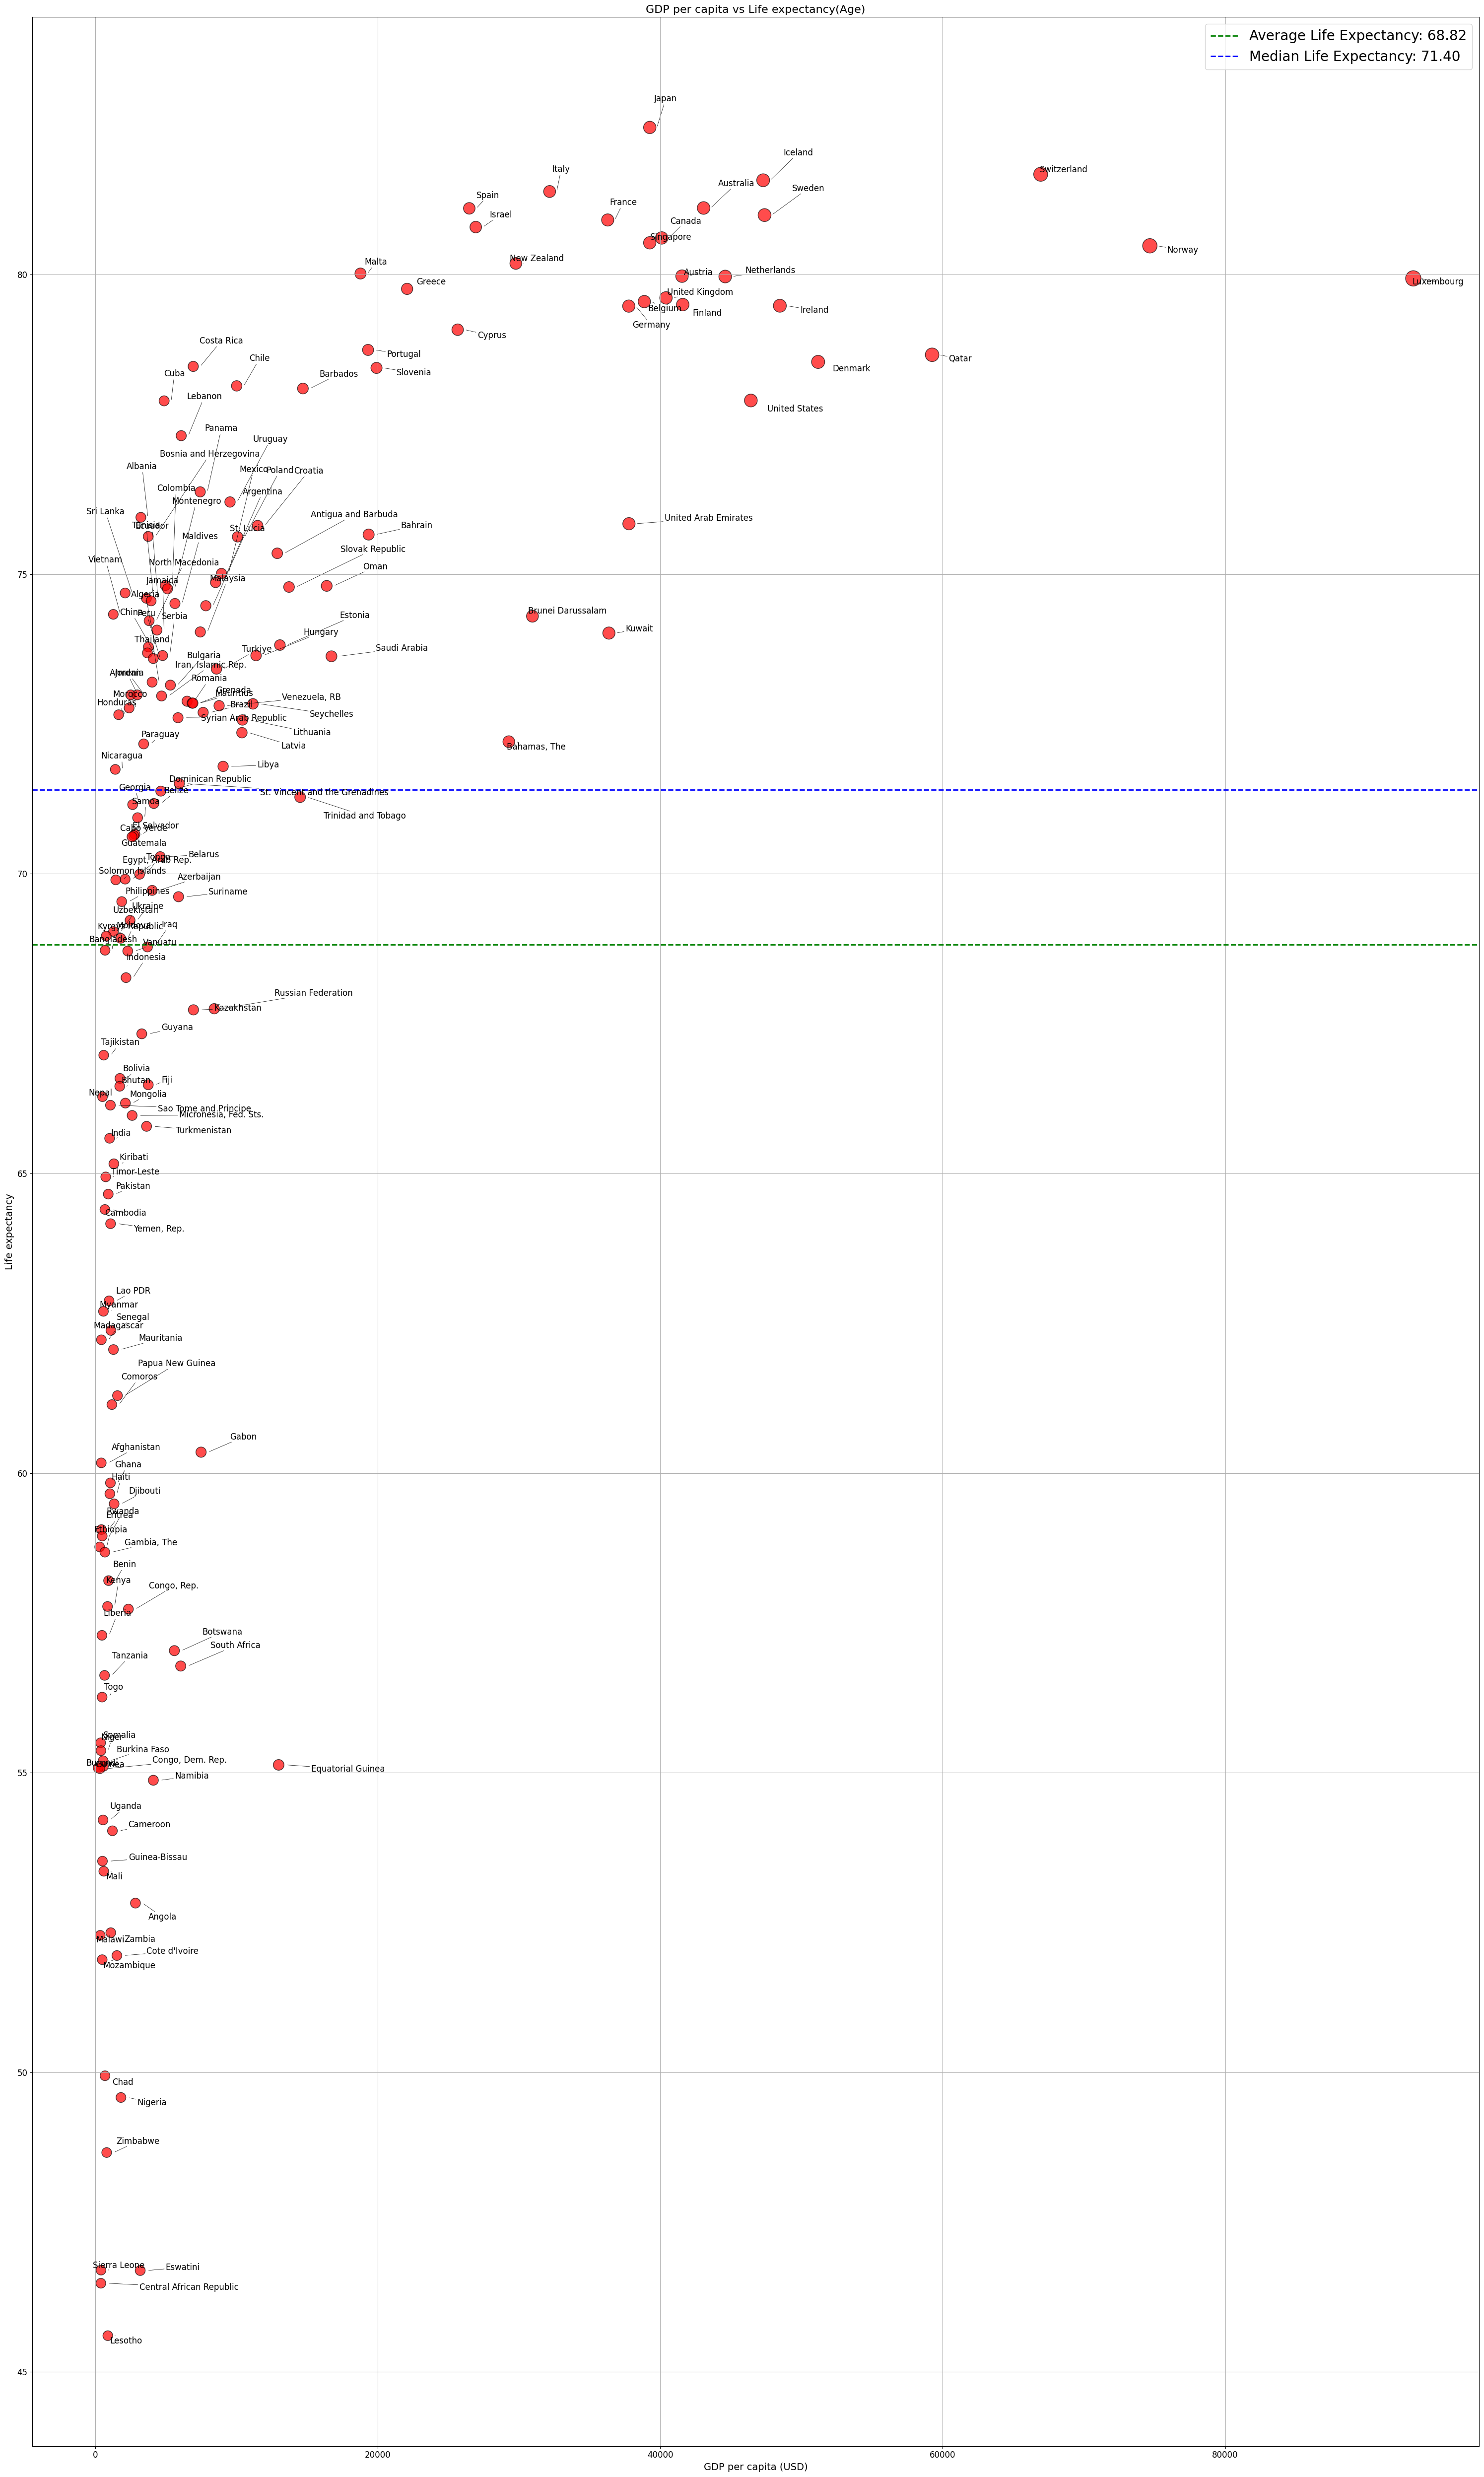

In [34]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scale the dot size based on GDP per capita
min_dot_size = 200
max_dot_size = 500
dot_size = min_dot_size + (max_dot_size - min_dot_size) * (sorted_df['GDP_per_capita_USD'] / sorted_df['GDP_per_capita_USD'].max())

average_life_expectancy = sorted_df["Life_expectancy"].mean()
print(average_life_expectancy)

median_life_expectancy = df_cleaned["Life_expectancy"].median()
print(median_life_expectancy)

# Plotting
plt.figure(figsize=(30, 50))  # Adjusted figure size

scatter = plt.scatter(sorted_df['GDP_per_capita_USD'], sorted_df['Life_expectancy'], s=dot_size, c='red', edgecolors="black", alpha=0.7)

texts = []
for i, country in enumerate(sorted_df.index):
    # Adjust label position
    texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,
                          fontsize=12, ha='left', va='center'))  # Adjusted label position

# Adjust label positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.title('GDP per capita vs Life expectancy(Age)', fontsize=16)
plt.xlabel('GDP per capita (USD)', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(average_life_expectancy, color="green", linewidth=2, linestyle="--", label=f'Average Life Expectancy: {average_life_expectancy:.2f}')

plt.axhline(median_life_expectancy, color="blue", linewidth=2, linestyle="--", label=f'Median Life Expectancy: {median_life_expectancy:.2f}')

plt.grid(True)

# Adding legend
plt.legend(loc='upper right', fontsize=20)

plt.tight_layout()
plt.show()

Conclusion for analysis:
From the data we had and the graph we plotted we can see that there seem to be a trend fo countries with higher GDP per capita having longer life expectancy since the majority of the countries with higher values seem to be on the upper end of the y-axis.
But we can also draw a conclusion that for the lower GDP per capita countries there does not seem to be a direct correlation with life expectancy.
There seem to be other factors that is effecting it as well.

In general for Countries on higher GDP per capita scale you could expect to have longer life expectency

In [9]:
# median_life_expectancy is the median

df_above_median_life = grouped_df[grouped_df["Life_expectancy"] > median_life_expectancy]

pd.set_option('display.max_rows', None)
df_above_median_life.sort_values(by="Life_expectancy", ascending=False)
#89 countries with longer life expectancy than the median

,GDP_per_capita_USD,Life_expectancy
Country,,
Japan,39253.707361,82.456250
Switzerland,66934.937654,81.675000
Iceland,47282.714878,81.575000
Italy,32161.912328,81.387500
Australia,43065.770761,81.112500
Spain,26473.573435,81.106250
Sweden,47381.314522,80.993750
France,36274.704077,80.912500
Israel,26932.507037,80.793750


In [10]:
average_gdp = df_cleaned["GDP_per_capita_USD"].mean()

print(f"The average GDP per capita:",average_gdp)
df_poor_but_long_life = grouped_df[(grouped_df['GDP_per_capita_USD'] < average_gdp) & 
                                    (grouped_df['Life_expectancy'] > median_life_expectancy)]

#List of countires with lower than average GDP per capita and Higher than median life expectancy
df_poor_but_long_life.sort_values(["GDP_per_capita_USD","Life_expectancy"])

The average GDP per capita: 10894.39150178776


,GDP_per_capita_USD,Life_expectancy
Country,,
Vietnam,1267.040358,74.331250
Nicaragua,1406.573920,71.743750
Honduras,1645.904207,72.656250
Sri Lanka,2105.309664,74.687500
Morocco,2387.989807,72.768750
Armenia,2501.660287,72.987500
Jordan,2961.399432,72.987500
Albania,3218.939374,75.950000
Paraguay,3416.442257,72.168750


In [23]:
#Does all big economy (GDP) longer life expectancy
df_gdp_country = df_merged.dropna(subset=["GDP_USD", "Life_expectancy"])

pd.set_option('display.max_rows', False)

df_gdp_country = df_gdp_country.groupby(["Country"])[["GDP_USD", "Life_expectancy"]].mean()
df_sorted_by_gdp = df_gdp_country.sort_values(by="GDP_USD", ascending=False).head(20)
df_sorted_by_gdp


,GDP_USD,Life_expectancy
Country,,
United States,1.409469e+13,77.90000
Japan,5.010405e+12,82.45625
China,4.949999e+12,73.68750
Germany,3.085531e+12,79.47500
United Kingdom,2.502122e+12,79.61250
France,2.332450e+12,80.91250
Italy,1.891482e+12,81.38750
Brazil,1.483330e+12,72.69375
Canada,1.343959e+12,80.61250


68.82198836276083


C:\Users\matti\AppData\Local\Temp\ipykernel_23728\2776263551.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(df_gdp_country['GDP_USD'][i] + 500, df_gdp_country['Life_expectancy'][i], country,


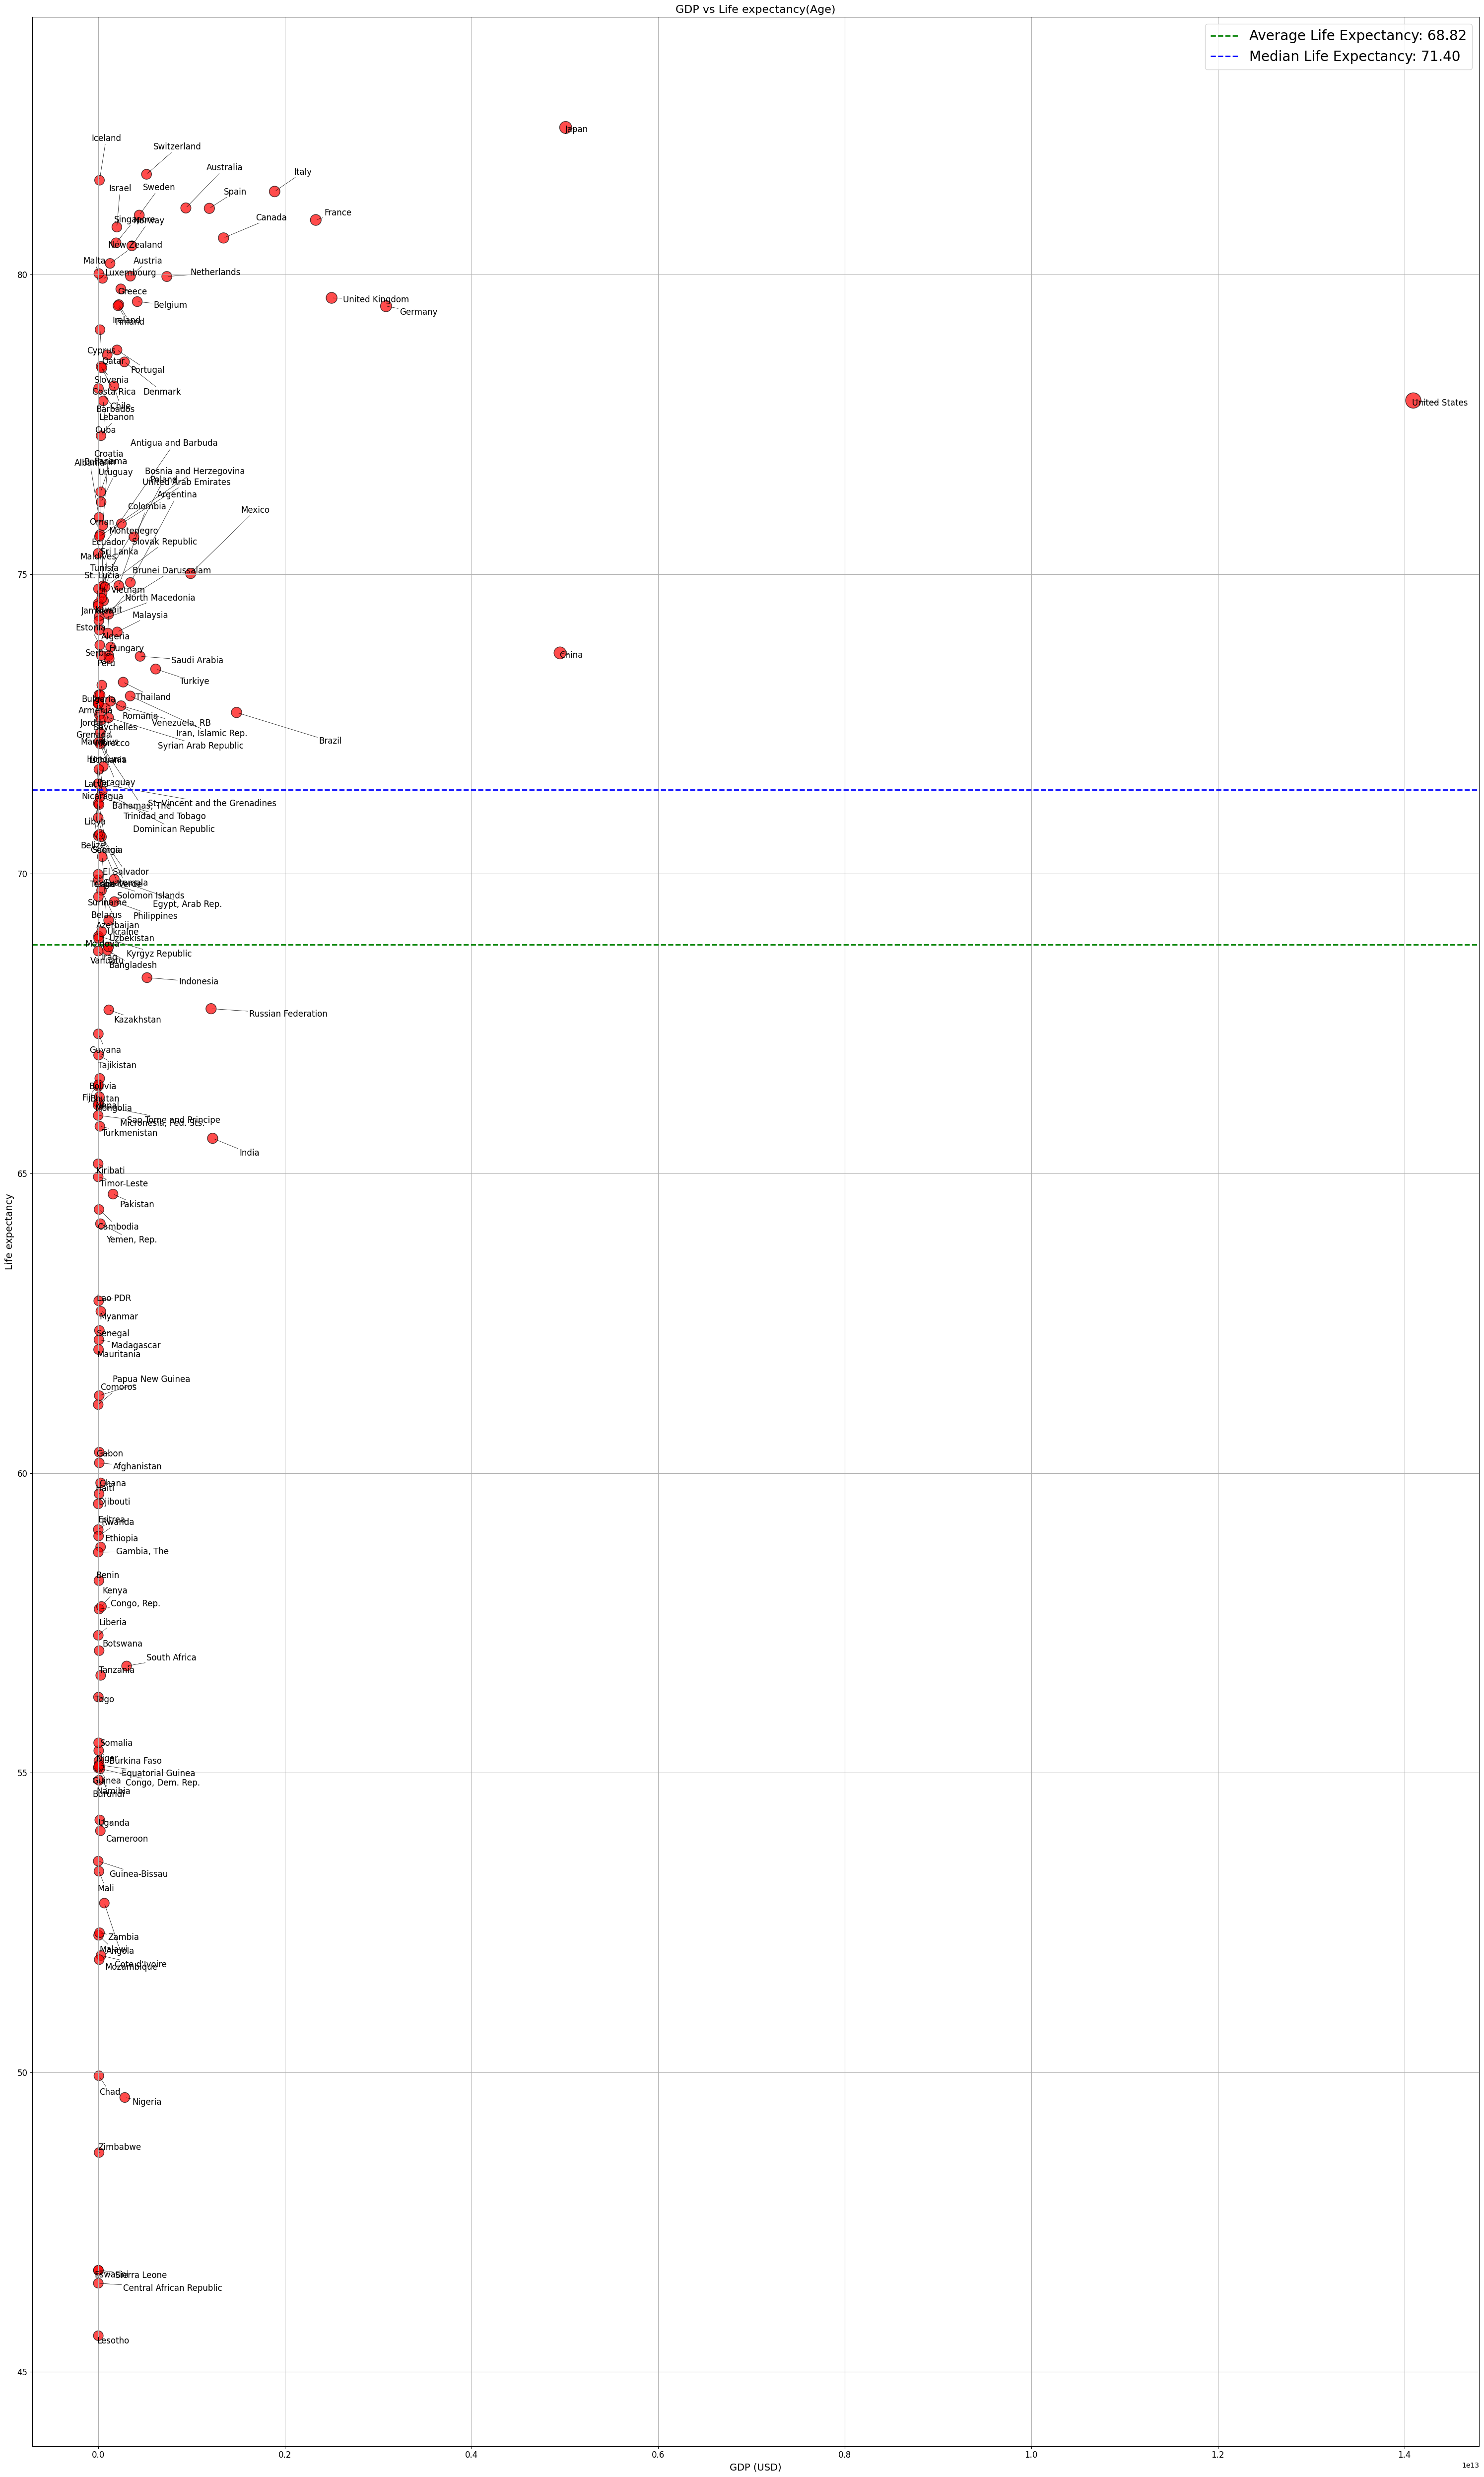

In [35]:
# Scale the dot size based on GDP
min_dot_size = 200
max_dot_size = 500
dot_size = min_dot_size + (max_dot_size - min_dot_size) * (df_gdp_country['GDP_USD'] / df_gdp_country['GDP_USD'].max())

print(average_life_expectancy)

# Plotting
plt.figure(figsize=(30, 50))  # Adjusted figure size

scatter = plt.scatter(df_gdp_country['GDP_USD'], df_gdp_country['Life_expectancy'], s=dot_size, c='red', edgecolors="black", alpha=0.7)

texts = []
for i, country in enumerate(df_gdp_country.index):
    # Adjust label position
    texts.append(plt.text(df_gdp_country['GDP_USD'][i] + 500, df_gdp_country['Life_expectancy'][i], country,
                          fontsize=12, ha='left', va='center'))  # Adjusted label position

# Adjust label positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.title('GDP vs Life expectancy(Age)', fontsize=16)
plt.xlabel('GDP (USD)', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(average_life_expectancy, color="green", linewidth=2, linestyle="--", label=f'Average Life Expectancy: {average_life_expectancy:.2f}')

plt.axhline(median_life_expectancy, color="blue", linewidth=2, linestyle="--", label=f'Median Life Expectancy: {median_life_expectancy:.2f}')

plt.grid(True)

# Adding legend
plt.legend(loc='upper right', fontsize=20)

plt.tight_layout()
plt.show()

From the graph we can see that generally the bigger economic countries seem to have longer life expectency with China being the outlier and placing below the other big economic countries but still
placing above average.